In [8]:
%matplotlib inline

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

## General.
- _(Un)supervised learning_: data set with(out) known labels.

## Naive Bayes.
$p(a\mid b) = \frac{p(b\mid a)p(a)}{p(b)=p(b\mid a)p(a)+p(b)+p(b\mid \neg a)p(\neg a)}$

- Naive because it assumes the variables ($a$ and $b$) to be independent.
- In case of more variables extend $p(b) = \dots$.

Used for.
- Class prediction.
- Text classification.
- (Un)supervised learning.

Strengths.
- Easy, fast, simple.
- Requires little data.

Weaknesses.
- Assumes independence.
- Cannot handle new unseen features. This can be countered by using Laplace smoothing however (assume equal prob. for all, deviate from that using training data).

## Support vector machines (SVMs).

## Decision trees.

## Datasets and questions.
Accuracy vs training set.
- More data increases accuracy, but it approaches a limit.
- More data is better than a fine tuned algorithm.

Data types.
- Quantative (numerical).
- Qualitative (categorical).
- Time series.
- Text.

Using data from different sources can make life hard. If for example data from source A contains a lot of Nans, a algorithm might classify a new example with a Nan to source A. While this might be entirely unjustified.

## Regressions.
_Continuous supervised learning_: regression problem ($y=ax+b)$. Minimization of the sum of the squared errors. 
- Algorithms: gradient descent, ordinary least squares.
- Squared values instead of absolute values are used, else multiple lines could be selected.
- Adding more data points increases the sum of squared errors. Therefore use $0.0<r^{2}<1.0$, which tells you how much of a change in $y$ can be explained by a change in $x$. Closer to $1.0$ is better.

## Estimation ##
slope/a     estimated:[[ 0.29512126]] actual:0.3
intercept/b estimated:[ 0.1030284] actual:0.1

## Train stats ##
r-squared score: 0.907827534355

## Test stats ##
r-squared score: 0.825489499487
Mean squared error: 0.00
Variance score: 0.83


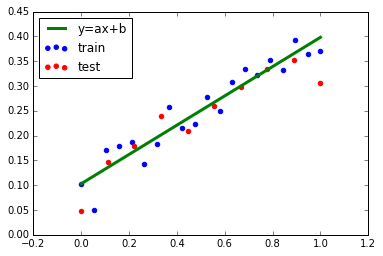

In [121]:
# Variables to estimate.
a = 0.3
b = 0.1

# Added noise params.
m = 0
s = .03

# Train data.
n_train = 20
x_train = np.linspace(0, 1, n_train)
noise_train = np.random.normal(m, s, n_train)
y_train = a * x_train + b + noise_train

# Test data.
n_test = 10
x_test = np.linspace(0, 1, n_test)
noise_test = np.random.normal(m, s, n_test)
y_test = a * x_test + b + noise_test

# Transform data into sklearn format.
x_test = np.reshape(x_test, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))
x_train = np.reshape(x_train, (-1, 1))
y_train = np.reshape(y_train, (-1, 1))

# Regression.
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Estimated params.
print('## Estimation ##')
print("slope/a     estimated:{} actual:{}".format(regr.coef_, a))
print("intercept/b estimated:{} actual:{}".format(regr.intercept_, b))

# Stats on train set.
print('\n## Train stats ##')
print("r-squared score: {}".format(regr.score(x_train, y_train)))

# Stats on test set.
print('\n## Test stats ##')
print("r-squared score: {}".format(regr.score(x_test, y_test)))
print("Mean squared error: %.2f" % np.mean((regr.predict(x_test) - y_test) ** 2))
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plots
fig, axes = plt.subplots(1, 1)
axes.scatter(x_train, y_train, color='b', label='train')
axes.scatter(x_test, y_test, color='r', label='test')
axes.plot(x_test, regr.predict(x_test), color='g', label='y=ax+b', linewidth=3)
axes.legend(loc=2);

Classification vs regression
- output: discrete - continuous
- objective: decision boundary - best fit line
- evaluation: accuracy - sum of squared errors/$r^{2}$

_Multivariate regression_: uses multiple input variables. For example $y=a_{0}x_{0}+a_{1}x_{1}+b$.

Outlier removal.
1. Train
1. Remove (10%) points having the largest (residual) error.
1. Repeat until done.


## Train stats with outlier. ##
r-squared score: 0.0848901934373

## Train stats without outlier. ##
r-squared score: 0.916459574753


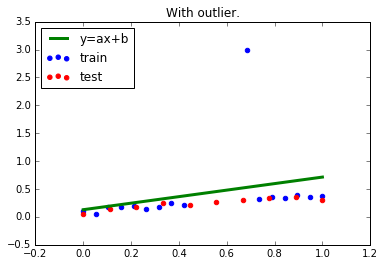

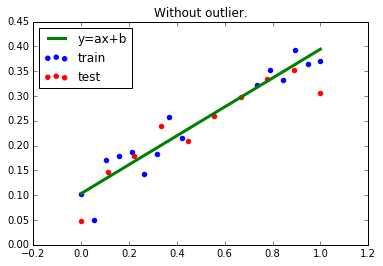

In [127]:
# Add outliers.
y_train[9][0] = 3
regr.fit(x_train, y_train)

# Stats on train set.
print('\n## Train stats with outlier. ##')
print("r-squared score: {}".format(regr.score(x_train, y_train)))

# Plots
fig, axes = plt.subplots(1, 1)
axes.scatter(x_train, y_train, color='b', label='train')
axes.scatter(x_test, y_test, color='r', label='test')
axes.plot(x_test, regr.predict(x_test), color='g', label='y=ax+b', linewidth=3)
axes.set_title('With outlier.')
axes.legend(loc=2);

# Find and delete largest error.
predictions = regr.predict(x_train)
max_diff = 0
idx = -1
for i in range(len(predictions)):
    diff = abs(predictions[i][0] - y_train[i])
    if diff > max_diff:
        max_diff = diff
        idx = i

x_train = np.reshape(np.delete(x_train, idx), (-1, 1))
y_train = np.reshape(np.delete(y_train, idx), (-1, 1))
regr.fit(x_train, y_train)

# Stats on train set.
print('\n## Train stats without outlier. ##')
print("r-squared score: {}".format(regr.score(x_train, y_train)))

# Plots
fig, axes = plt.subplots(1, 1)
axes.scatter(x_train, y_train, color='b', label='train')
axes.scatter(x_test, y_test, color='r', label='test')
axes.plot(x_test, regr.predict(x_test), color='g', label='y=ax+b', linewidth=3)
axes.set_title('Without outlier.')
axes.legend(loc=2);

## Clustering
Unsupervised learning.
- Clustering. This section.
- Dimensionality reduction. Later section.

K-means.
1. Assign. Assign all points to the closest k-point.
1. Optimize. Center all k-points with respect to their assigned data points.
1. Repeat until no (significant) change in the k-points happens.

Limitations.
- Different seeds can lead to different outcomes.
- Number of centroids matters. Else points (do not) get clustered together while they should (not).
- Symmetric clusters can be divided in half, and assigning each half to a different cluster. Even if number of centroids is correct.

In [274]:
n = 100

# Create data.
def create_cluster(center=0, width=1, n=100):
    x = np.random.normal(center, width, n)
    y = np.random.normal(0, width, n)
    return x, y
x_a, y_a = create_cluster(center=0, width=1, n=n)
x_b, y_b = create_cluster(center=6, width=1, n=n)

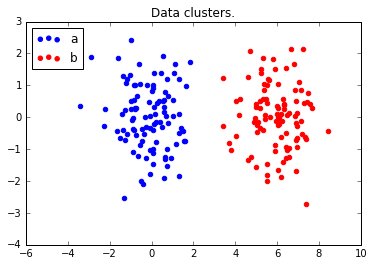

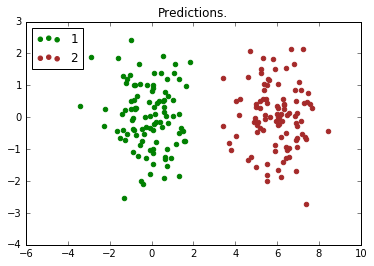

In [275]:
# !!!!!
# Scaling is important. If below is uncommented than clusters are 
# solely based on y values.
# !!!!!
# y_a *= 2000
# y_b *= 2000

x = np.concatenate([x_a, x_b])
y = np.concatenate([y_a, y_b])
X = np.transpose(np.array([x, y]))

# Plot data.
fig, ax = plt.subplots(1, 1)
ax.scatter(x_a, y_a, color='b', label='a')
ax.scatter(x_b, y_b, color='r', label='b')
ax.legend(loc=2)
ax.set_title('Data clusters.')

# Fit k-means.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
pred_mask = kmeans.fit_predict(X)
pred_mask = pred_mask.astype(np.bool)
pred_mask_a = pred_mask
pred_mask_b = np.invert(pred_mask)

# Plot predictions.
fig, ax = plt.subplots(1, 1)
ax.scatter(X[pred_mask_a, 0], X[pred_mask_a, 1], color='g', label='1')
ax.scatter(X[pred_mask_b, 0], X[pred_mask_b, 1], color='brown', label='2')
ax.legend(loc=2)
ax.set_title('Predictions.');

## Feature scaling.
Affected algorithms.
- SVM with RBF kernel
- K-means clustering

Unaffected algorithms.
- Decision trees (because of vertical/horizontal decision boundaries).
- Linear regression (Just scales the a, b).

## Text learning.
**Bag of words** lists all words with a frequency count for each.
- Word order does not matter.
- Combined words are treated separately.
- High frequency words have typically low information.
- Words having the same 'stem' ((un)resonsive), can be combined with a stemmer. This groups words with (almost) the same meaning.
**Tf-idf**
- Term frequence (bag of words) rates common words high.
- Inverse document frequence rates rare words high.
- Tf-idf = tf * idf. Rates uncommen words that occur often in a document the highest.

In [277]:
from nltk.corpus import stopwords
sw = stopwords.words("english")
print sw[0]

i


## Feature selection.
- Select best features.
- Generate new features.
    1. Intuition.
    1. Code.
    1. Visualize.
    1. Repeat.
   
Sklearn can select the most powerful features.
- SelectPercentile()
- SelectKBest()

Bias-variance dilemma.
- High bias results in a high error on the training (and test) set. Often when too few features are used.
- High variance results in a low error on the training set but high on the test set. Often when too many features are used.

**Regularization** tries to find the sweet spot between high bias and high variance.
- Regression case: **lasso regression** combines SSE with a penalty for each additional feature. If the penalty outweighs the SSE gain it gives, it is omitted.

TODO sklearn with lasso

## Principal component analysis (PCA).
Rotates coordinate system such that some axes contain no or little info.

Measurable vs latent variables.
- Measurable: direct features.
- Latent variables: hidden, but are responsible for the values of the measurable variables.

When to use it?
- Finding latent features.
- Dimensionality reduction.
    - Visualization of high dimensional data.
    - Noise reduction.
    - Other algorithms may work better because less features to overfit to.   And the features are more distinct.

Perform PCA before feature selection.

What is the difference by regression and PCA?
Maybe vertical errors (regr) vs shortest errors (PCA)..?

TODO information loss/entropy etc.

## Validation
Cross validation.
- K-fold. Averages accuracy.
- Use shuffle.
- Sklearn can be used.
- no pca.fit() on test data. only pca.transform().

GridSearchCV for param search.

## Validation.
$Accuracy = \frac{correctly\ classified\ data}{all\ data}$  
- Not good for skewed classes.
- Not good if precesion or recall is more important.

Confusion matrix.

|           | Actual         |                |
|-----------|----------------|----------------|
| **Predicted** | Positive       | Negative       |
| Positive  | True positive  | False positive |
| Negative  | False negative | True negative  |

Recall vs precision.
- Recall: $true\ positive = \frac{true\ positive}{true\ positive + false\ negative}$. How many positive items were recalled.
- Precision: $true\ positive = \frac{true\ positive}{true\ positive + false\ positive}$. From all positive labeled cases, which are indeed positive.

## Overview.
TODO
- Dataset/Question.
- Features.
- Algorithms.
- Evaluation.